# Lift score example

Just a simple example of computing lift scores, as described [here](https://www.kdnuggets.com/2016/03/lift-analysis-data-scientist-secret-weapon.html).

In [1]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=7d9ff61192b21e43c94f59abe6d09cef77ad8dbcbdbfbd974d9e79b28dd87838
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pandas

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
X, y = load_breast_cancer(as_frame=True, return_X_y=True)

In [7]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
y.mean()

0.6274165202108963

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [10]:
LRmodel = LogisticRegression(
    penalty='l1',
    C=0.5,
    solver='liblinear',
    max_iter=1000,
)

In [11]:
LRmodel.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=1000, penalty='l1', solver='liblinear')

In [12]:
y_train_pred = LRmodel.predict_proba(X_train)[:,1]
y_test_pred = LRmodel.predict_proba(X_test)[:,1]

In [13]:
def lift_score_bins(
    y: np.array,
    y_pred_proba: np.array,
    nbins: int=10,
):
    LS_bins = np.zeros((nbins,))

    base_rate = np.mean(y)

    bin_width = 1.0/nbins
    for i,(lower,upper) in enumerate(zip(np.arange(0,1.0,bin_width), np.arange(bin_width,1+bin_width,bin_width))):
        idx_in_bin = np.argwhere((lower<=y_pred_proba) & (y_pred_proba<upper)).reshape(-1)
        if len(idx_in_bin) == 0:
            LS_bins[i] = np.nan
        else:
            y_in_bin = y[idx_in_bin]
            LS_bins[i] = np.mean(y_in_bin) / base_rate

    return LS_bins

In [14]:
LS_bins_test = lift_score_bins(y_test.values, y_test_pred)

In [15]:
LS_bins_test

array([0.        , 0.        , 0.        ,        nan,        nan,
              nan,        nan, 1.20505618, 1.60674157, 1.58690526])

In [16]:
LS_bins_train = lift_score_bins(y_train.values, y_train_pred)

In [17]:
LS_bins_train

array([0.        , 0.        , 0.59608209, 0.59608209, 0.52985075,
       0.79477612, 1.13539446, 0.39738806, 1.34500574, 1.58955224])

Text(0.5, 0, 'predicted probability')

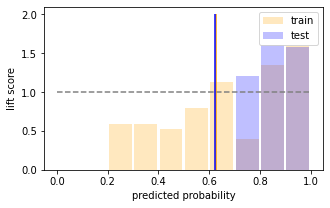

In [18]:
fig, ax = plt.subplots(figsize=(5,3))

nbins=10

ax.bar(
    x=np.arange((1.0/nbins)/2,1.0+(1.0/nbins)/2,(1.0/nbins)),
    height=LS_bins_train,
    width=(1.0/nbins)*0.9,
    color='orange',
    alpha=0.25,
    label='train',
)
ax.bar(
    x=np.arange((1.0/nbins)/2,1.0+(1.0/nbins)/2,(1.0/nbins)),
    height=LS_bins_test,
    width=(1.0/nbins)*0.9,
    color='blue',
    alpha=0.25,
    label='test',
)
ax.hlines(
    1,
    0,
    1,
    color='gray',
    linestyle='--',
)
ax.vlines(
    np.mean(y_train),
    0,
    2,
    color='orange',
    linestyle='-',
)
ax.vlines(
    np.mean(y_test),
    0,
    2,
    color='blue',
    linestyle='-',
)

ax.legend(loc='best')

ax.set_ylabel('lift score')
ax.set_xlabel('predicted probability')